In [234]:
import pandas as pd 
import numpy as np 
from pandas.plotting import table
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from datetime import date 
import math

# Read data from file 
date_computed = str(date.today())
file_path = os.path.join(".", "output", date_computed + "_trajectory_internal_geometry" + ".csv")

In [235]:
# Plot histogram to observe distribution
data = pd.read_csv(file_path)

# angles 21 - 28 

# [-2:]
# #------------------------- Output to file ----------------------#
# output_path = os.path.join(".", "visuals", date_computed + "_hop21_IC_histogram" + ".png")
# os.makedirs(os.path.dirname(output_path), exist_ok=True) # create 'visual' folder if not existed yet
# plt.savefig(output_path)

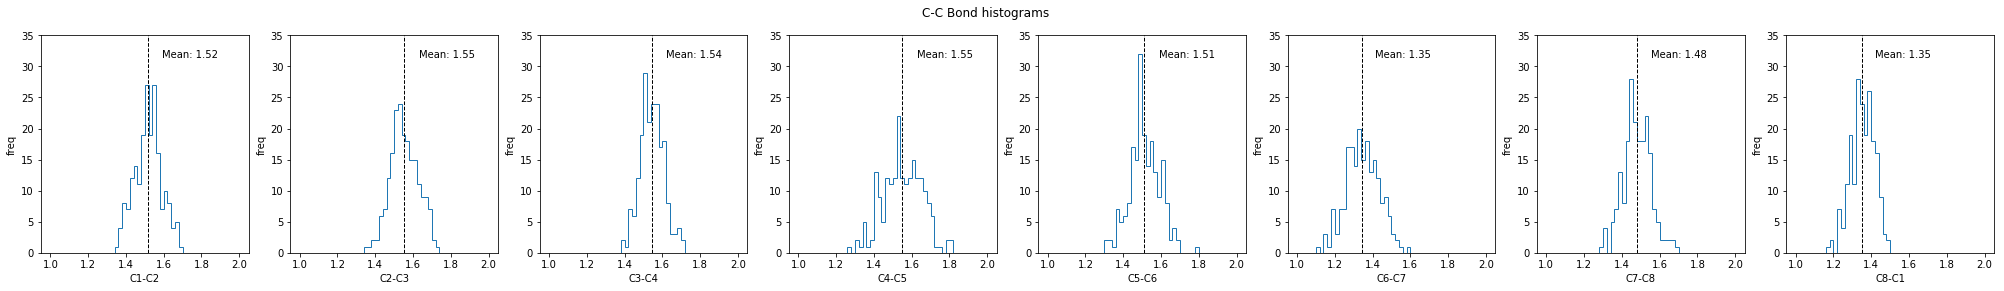

In [236]:
# plot C-C bonds
C_C_df = data.iloc[:,1:9]
fig, axes = plt.subplots(ncols=len(C_C_df.columns), figsize=(35,4))
fig.suptitle('C-C Bond histograms') 

col_index=1
for col, axe in zip(C_C_df.columns, axes):
        x = C_C_df[col]
        axe.hist(x, bins=50, range=(1, 2), histtype='step', label=col)
        axe.set_xlabel(col)
        axe.set_ylabel('freq')
        axe.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
        axe.set_ybound(lower=0,upper=35)
        ymin,ymax=axe.get_ylim()
        axe.text(x.mean()*1.05, ymax*0.9,'Mean: {:.2f}'.format(x.mean()))
        
#------------------------- Output to file ----------------------#
output_path = os.path.join(".", "visuals","histograms", date_computed + "_C_C_IC_value" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create 'visual' folder if not existed yet
plt.savefig(output_path)

In [233]:
# # Plot how each IC varies (w.r.t. traj#)
# sub_data = data.iloc[:,1:] # slice off first column (TRAJ #)
# sub_data.plot(kind="line", subplots=True, layout=(6, 6), figsize=(20, 20), sharex=False, title="Value vs Traj");
# #------------------------- Output to file ----------------------#
# output_path = os.path.join(".", "visuals", date_computed + "_hop21_IC_value_variations" + ".png")
# os.makedirs(os.path.dirname(output_path), exist_ok=True) # create 'visual' folder if not existed yet
# plt.savefig(output_path)

,initial,hop
dih H9-C6-C7-H10,7.504124,49.029071
dih H11-C8-C1-H12,10.743849,45.512307


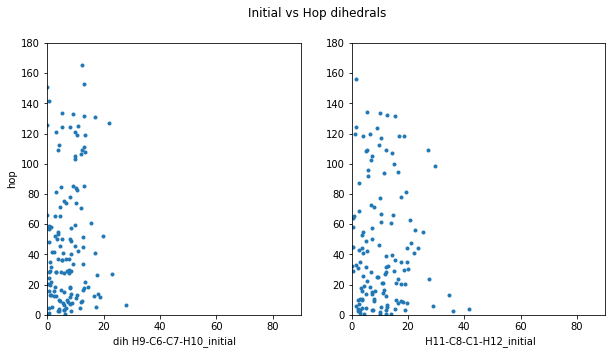

In [238]:
# --------------- Graph showing correlation between initial structure vs. structure at twist -------------# 
# Read data from file 
date_computed = str(date.today())
file_path_1 = os.path.join(".", "output", date_computed + "_trajectory_internal_geometry" + ".csv")
file_path_2 = os.path.join(".", "output", date_computed + "_hop21_internal_geometry" + ".csv")
initial_data = pd.read_csv(file_path_1)
hop_data = pd.read_csv(file_path_2)

# ----------------------- Merge & filter ----------------------- #
dih_merge = pd.merge(initial_data[['TRAJ', 'dih H9-C6-C7-H10', 'dih H11-C8-C1-H12']], \
                         hop_data[['TRAJ', 'dih H9-C6-C7-H10', 'dih H11-C8-C1-H12']], \
                         suffixes=('_initial','_hop'), on='TRAJ')

# ------------------- Compute mean for dihedrals ----------------- #
mean_initial = dih_merge.loc[:,['dih H9-C6-C7-H10_initial','dih H11-C8-C1-H12_initial']] \
                        .rename(columns={'dih H9-C6-C7-H10_initial': 'dih H9-C6-C7-H10', 'dih H11-C8-C1-H12_initial':'dih H11-C8-C1-H12'}) \
                        .mean(axis=0)

mean_hop     = dih_merge.loc[:,['dih H9-C6-C7-H10_hop','dih H11-C8-C1-H12_hop']] \
                        .rename(columns={'dih H9-C6-C7-H10_hop': 'dih H9-C6-C7-H10', 'dih H11-C8-C1-H12_hop':'dih H11-C8-C1-H12'}) \
                        .mean(axis=0)

compare_mean = pd.concat([mean_initial.rename('initial'), \
                          mean_hop.rename('hop')], \
                          axis=1, sort=False)                                           # axis{0/’index’, 1/’columns’},
display(compare_mean)

# ----------------------- Plot ----------------------- #
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(dih_merge['dih H9-C6-C7-H10_initial'],dih_merge['dih H9-C6-C7-H10_hop'], '.')
plt.xlabel('dih H9-C6-C7-H10_initial')
plt.xlim(0,90)
plt.ylabel('hop')
plt.ylim(0,180)

plt.subplot(122)
plt.plot(dih_merge['dih H11-C8-C1-H12_initial'],dih_merge['dih H11-C8-C1-H12_hop'],'.')
plt.xlabel(' H11-C8-C1-H12_initial')
plt.xlim(0,90)
plt.ylim(0,180)
plt.suptitle('Initial vs Hop dihedrals')

#------------------------- Output to file ----------------------#
output_path = os.path.join(".", "visuals", "initial_vs_hop", date_computed + "_initial_vs_hop" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create folder if not existed yet
plt.savefig(output_path)

In [ ]:
Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
